# The Foundation: Markov Decision Processes

*[Documentinng a personal learning experience while working and coding with the printed book Deep Reinforcement Learning with Python: RLHF for Chatbots and Large Language Models by Nimish Sanghi, Apress, 2nd Edition July 2024, ISBN13 979-8868802720; the GitHup repo accompanying the book can be found at [nsanghi/drl-2ed](https://github.com/nsanghi/drl-2ed)]*

Reinforcement Learning involves sequential decision making. Stochastic processes are used to model sequential decision-making behavior.

## Definition of Reinforcement Learning (RL)

__The cycle of an agent interacting with the environment:__

1. agent receiving/setting __state__ S<sub>t</sub> based on the environment input (data)
2. agent taking action based on the current state
   <br/>-- agent at time t in state S<sub>t</sub>, taking __specific action from available set__ (policy?)
   <br/>-- System transitions to time t + 1
3. agent getting a numerical __reward__
   <br/>-- Environment responds with numerical reward R<sub>t</sub> + 1
   <br/>-- Environment pushes agent into new state S<sub>t</sub> + 1
5. agent finding itself in a __new state__ S<sub>t</sub> + 1

The cycle of __"state to action to reward and next state"__ goes on until the agent reaches some end-goal state. This end state could be the completion of a task or having reached a specific number of time steps.

__"The purpose of reinforcement learning is to have the agent learn the best possible action for each of the states it could find itself in, keeping in mind the cumulative reward maximization objective"__ (Nimish Sanghi, Deep Reinforcement Learning with Python).

States are sometimes referred to as *observations*. A state may only be *partially observable* (the agent only gets partial details of the actual state). The agent takes an action based on a full or (only) partial state information. Therefore a learning algorithm can be significantly influenced by the level (or degree?) of observability.

## Reinforcement Learning Environments

Examples to understand in depth the cycle of state/observation to action to reward to the next state.

### The Mountain Car Environment of the Gymnasium Library

The [Gymnasium Library](https://gymnasium.farama.org/) is a Python library providing a standard interface for single-agent RL environments. It's a fork of OpenAI’s Gym library. The Gymnasium interface is simple, pythonic, and capable of representing general RL problems, and has a compatibility wrapper for old Gym environments.

In [1]:
# poetry add "gymnasium[classic_control]" needs to run to install pygame
import gymnasium as gym
from matplotlib import pyplot as plt

__The following explanation is taken from the book author's [GitHup repo](https://github.com/nsanghi/drl-2ed/blob/main/chapter2/2.a-RL-environment.ipynb):__

The [Mountain Car MDP](https://gymnasium.farama.org/environments/classic_control/mountain_car/) is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. There are two versions of the mountain car domain in gymnasium: one with discrete actions and one with continuous. This version is the one with discrete actions.

Each environment has to specify an `action space` which are the ways an agent/policy can interact with the environment. In case of Mountain car we have following possible actions:

There are 3 discrete deterministic actions:

0: Accelerate to the left<br/>
1: Don’t accelerate<br/>
2: Accelerate to the right<br/>

Each environment's state is defined as `Observation Space` - i.e. the part of the state this is visible to the agent to make decisions.

The observation for Mountain Car is a ndarray with shape (2,) where the elements correspond to the following:

| Num | Observation                          | Min   | Max  | Unit         |
|-----|--------------------------------------|-------|------|--------------|
| 0   | position of the car along the x-axis | -1.2  | 0.6  | position (m) |
| 1   | velocity of the car                  | -0.07 | 0.07 | velocity (v) |


We use an agent/policy to take an action using the following method in the `environment`<br/>
`action = policy(observation)`

Then we pass the action to the environment to act using `env.step(action)`. The function call returns a tuple of five values: `observation, reward, terminated, truncated, info`. the returned

- `observation` is the new state environment has moved into as a result of our action.
- `reward` is the numerical reward our agent gets from environment as a result of the action it took.
- `terminated` is a boolean which is true when the agent's action has resulted in completion of the task or agent has moved into a bad state (like falling off the cliff) from which it cannot recover. In other words, good or bad, the agent's action has resulted into a new state which is a terminal state from which agent cannot recover.
- `truncated` is a boolean which is true when the agent could not complete the task and timeout happens. There are a few other scenarios when this could happen as a result of other actions. You can read more about it in the documentation for `gymnasium`.
- `info` contains certain other information for debugging the environment

initial observation: [-0.43640453  0.        ]
possible actions: 3

taking action: 2
got reward: -1.0. New state/observation is: [-4.3605104e-01  3.5347554e-04]

taking action: 2
got reward: -1.0. New state/observation is: [-0.43534666  0.00070439]

taking action: 0
got reward: -1.0. New state/observation is: [-0.43629646 -0.00094979]

taking action: 2
got reward: -1.0. New state/observation is: [-0.43689355 -0.0005971 ]

taking action: 2
got reward: -1.0. New state/observation is: [-4.3713364e-01 -2.4008298e-04]


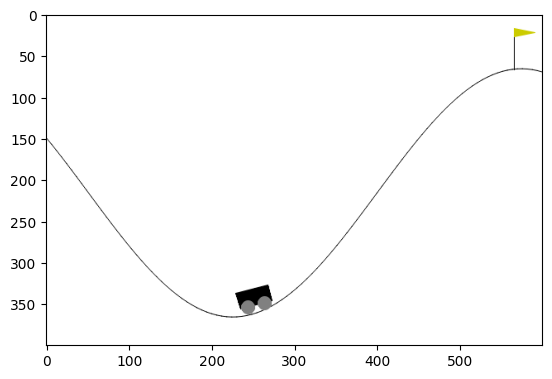

In [2]:
# There are two versions of the mountain car domain in gymnasium: one with discrete actions and one with continuous
# This version is the one with discrete actions

# THE AGENT'S OBJECTIVE IS TO REACH THE FLAG IN THE SHORTEST POSSIBLE NUMBER OF STEPS

# (1) instantiating the MountainCar environment
env = gym.make('MountainCar-v0', render_mode="rgb_array")

# (2) initializing the environment
# reset environment and get initial observation/state
# Observation/state is a tuple of (position, velocity)
obs, info = env.reset() # returns the initial observation

# initial observation returns a tuple with two values: (x-position, x-velocity)
print("initial observation:", obs)
# the agent uses obs to find the best action: action = policy(obs)

# possible 3 actions
# {0: "accelerate to left", "1": "do nothing", "2": "accelerate to right"}
print("possible actions:", env.action_space.n)

# reinforcement learning is all
# about learning to take good actions
# from a given state/observation
# right now taking a random action
def policy(observation):
    # in this example the agent is only taking one random action from the action_space
    # the action_space are the specified ways in which an agent/policy can interact with the environment
    # possible actions: 
    # 0: Accelerate to the left
    # 1: Don’t accelerate
    # 2: Accelerate to the right
    # one of them gets picked randomly
    return env.action_space.sample()


# take 5 random actions/steps
for _ in range(5):

    # to render environment for visual inspection
    # when you train, you can skip rendering to speed up
    plt.imshow(env.render()) # <- WHAT IS plt ? and how does at affect the environment ?

    # based on current policy, use the current observation
    # to find the best action to take.
    action = policy(obs) # finding the best action depending on the current observation, in this example randomly
    print("\ntaking action:", action)

    # PASS THE ACTION TO ENV which will return back <- this is the important line
    # env.step(action) is called returning a tuple with five values
    # at this point the system moves from time t to time t + 1
    
    # ... which will return back with new state/"observation" and "reward"
    # there is a "done" flag which is true when game ends
    # done flag has been split into terminated (game ends) and truncated (times out)
    # "info" provides some diagnostic information
    obs, reward, terminated, truncated, info = env.step(action)
    print("got reward: {0}. New state/observation is: {1}".format(reward, obs))

# close the environment
env.close()

### The Cart Pole Environment of the Gymnasium Library

__The following explanation is taken from the book author's [GitHup repo](https://github.com/nsanghi/drl-2ed/blob/main/chapter2/2.a-RL-environment.ipynb):__

This [environment](https://gymnasium.farama.org/environments/classic_control/cart_pole/) corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in “ Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem ”. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.

**Action Space**
The action is a ndarray with shape (1,) which can take values {0, 1} indicating the direction of the fixed force the cart is pushed with. `0` is the action to push the cart to the left and `1` is the action to push the cart to the right.

**Observation Space**
The observation is a ndarray with shape (4,) with the values corresponding to the following positions and velocities:

| Num |      Observation      |         Min         |        Max        |
|:---:|:---------------------:|:-------------------:|:-----------------:|
| 0   | Cart Position         | -4.8                | 4.8               |
| 1   | Cart Velocity         | -Inf                | Inf               |
| 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| 3   | Pole Angular Velocity | -Inf                | Inf               |

initial observation: (array([ 0.02740954, -0.03747964,  0.02070437, -0.0167141 ], dtype=float32), {})
possible actions: 2

taking action: 1
got reward: 1.0. New state/observation is: [ 0.02665995  0.15733936  0.02037009 -0.30279332]

taking action: 1
got reward: 1.0. New state/observation is: [ 0.02980673  0.35216516  0.01431422 -0.588983  ]

taking action: 0
got reward: 1.0. New state/observation is: [ 0.03685004  0.15684573  0.00253456 -0.29182562]

taking action: 0
got reward: 1.0. New state/observation is: [ 0.03998695 -0.03831227 -0.00330195  0.00165559]

taking action: 1
got reward: 1.0. New state/observation is: [ 0.03922071  0.15685688 -0.00326884 -0.29206732]


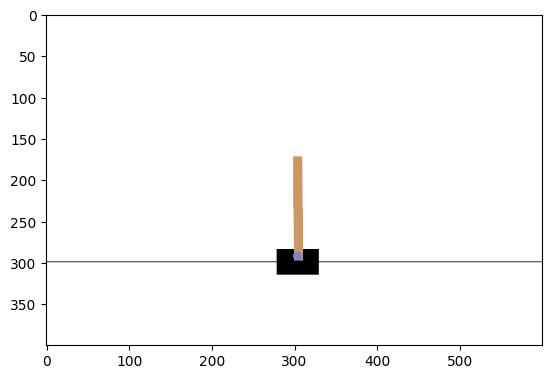

In [3]:
env = gym.make('CartPole-v1', render_mode="rgb_array")
obs = env.reset()
print("initial observation:", obs)
print("possible actions:", env.action_space.n)


def policy(observation):
    return env.action_space.sample()


for _ in range(5):
    plt.imshow(env.render())

    action = policy(obs)
    print("\ntaking action:", action)

    obs, reward, terminated, truncated, info = env.step(action)
    print("got reward: {0}. New state/observation is: {1}".format(reward, obs))


# close the environment
env.close()